In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mult_3loops(A,B):
    m,n=A.shape
    p,q=B.shape
    
    C = np.zeros((m,q)) # initialize C
    for i in range(m):
        for j in range(q):
            for k in range(n):
                C[i,j] += A[i,k]*B[k,j]
    return C

In [3]:
def mult_2loops(A,b):
    m,n=A.shape
    p,q=B.shape
    
    C = np.zeros((m,q)) # initialize C
    for i in range(m):
        for j in range(q):
            C[i,j] = A[i,:].dot(B[:,j])
    return C

In [4]:
def mult_1loop(A,b):
    m,n=A.shape
    p,q=B.shape
    
    C = np.zeros((m,q)) # initialize C
    for j in range(q):
        C[:,j] = A.dot(B[:,j])
    return C

In [5]:
A = np.random.randn(3,3)
B = np.random.randn(3,3)

In [6]:
A.dot(B)

array([[-1.48351192,  2.22056597,  2.57716391],
       [-0.57273014,  1.33511402,  1.10463473],
       [-1.33946037, -1.02937631, -1.17905899]])

In [7]:
mult_3loops(A,B)

array([[-1.48351192,  2.22056597,  2.57716391],
       [-0.57273014,  1.33511402,  1.10463473],
       [-1.33946037, -1.02937631, -1.17905899]])

In [8]:
mult_2loops(A,B)

array([[-1.48351192,  2.22056597,  2.57716391],
       [-0.57273014,  1.33511402,  1.10463473],
       [-1.33946037, -1.02937631, -1.17905899]])

In [9]:
mult_1loop(A,B)

array([[-1.48351192,  2.22056597,  2.57716391],
       [-0.57273014,  1.33511402,  1.10463473],
       [-1.33946037, -1.02937631, -1.17905899]])

## Loosing your loops

In [10]:
A = np.random.randn(100,100)
B = np.random.randn(100,100)

In [11]:
%%timeit
C = mult_3loops(A,B)

745 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit
C = mult_2loops(A,B)

18.1 ms ± 828 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
C = mult_1loop(A,B)

490 µs ± 7.13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
%%timeit
C = A.dot(B)

41.5 µs ± 640 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Timing matrix multiplication

In [15]:
import time

In [31]:
ns = [1000,2000,4000,8000]
t = np.zeros(len(ns))
for i,n in enumerate(ns): 
    print(n)

    A = np.random.randn(n,n) 
    B = np.random.randn(n,n)
    
    start = time.time() 
    C = A.dot(B)
    end = time.time() 
    t[i] = end - start 

1000
2000
4000
8000


Text(0.5, 1.0, 'Matrix multiplication')

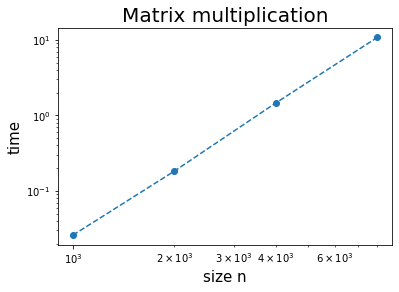

In [35]:
plt.loglog(ns,t,'o--')
plt.xlabel('size n',fontsize=15)
plt.ylabel('time', fontsize=15)
plt.title('Matrix multiplication', fontsize=20)

In [33]:
# slope
(np.log(t[3])-np.log(t[0]))/(np.log(ns[3])-np.log(ns[0]))

2.8980346108602935

## Where do I put the parentheses?

In [19]:
n = 1000
A = np.random.randn(n,n)
B = np.random.randn(n,1)
C = np.random.randn(1,n)

In [20]:
%%timeit
A.dot(B.dot(C))

34 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%%timeit
(A.dot(B)).dot(C)

5.51 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
ns = [1000,2000,4000,8000]
t = np.zeros(len(ns))
t_naive = np.zeros(len(ns))
for i,n in enumerate(ns): 
    print(n)

    A = np.random.randn(n,n)
    B = np.random.randn(n,1)
    C = np.random.randn(1,n)
    
    # slow rank-1-matrix multiplication
    start = time.time() 
    A.dot(B.dot(C))
    end = time.time() 
    t_naive[i] = end - start 
    
    # fast rank-1-matrix multiplication
    start = time.time() 
    (A.dot(B)).dot(C)
    end = time.time() 
    t[i] = end - start 

1000
2000
4000
8000


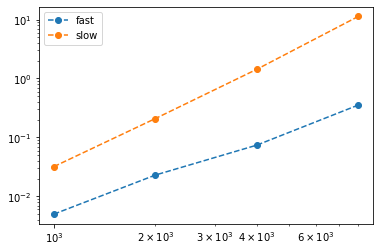

In [23]:
plt.loglog(ns,t,'o--',label='fast')
plt.loglog(ns,t_naive,'o--',label='slow')
plt.legend()